In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import SimpleRNN, Dense

In [2]:
df = pd.read_csv('input/GoogleStock/stock_prices.xls')  

In [3]:
data = df['Close'].values.reshape(-1, 1)

In [4]:
# Normalize the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

In [5]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [6]:
sequence_length = 20
X, y = create_sequences(data_normalized, sequence_length)

In [7]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
model = Sequential([
    SimpleRNN(units=50, input_shape=(X.shape[1], X.shape[2]), activation='relu'),
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
start_time = time.time()

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

total_time = time.time() - start_time
total_time

In [8]:
model_name = 'model_4_RNN'

In [ ]:
model.save(model_name)

In [9]:
model = load_model(model_name)

In [10]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

4/4 [==============================] - 0s 9ms/step


In [11]:
y_train_pred_actual = scaler.inverse_transform(y_train_pred)
y_test_pred_actual = scaler.inverse_transform(y_test_pred)

In [12]:
from sklearn.metrics import mean_squared_error
train_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(y_train), y_train_pred_actual))
test_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test), y_test_pred_actual))

In [13]:
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train RMSE: 1.9774
Test RMSE: 3.2272


In [15]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss:.4f}')
print(f'Test Loss: {test_loss:.4f}')

Train Loss: 0.0004
Test Loss: 0.0011


In [16]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse transform the predictions to get actual prices
y_train_pred_actual = scaler.inverse_transform(y_train_pred)
y_test_pred_actual = scaler.inverse_transform(y_test_pred)

4/4 [==============================] - 0s 8ms/step


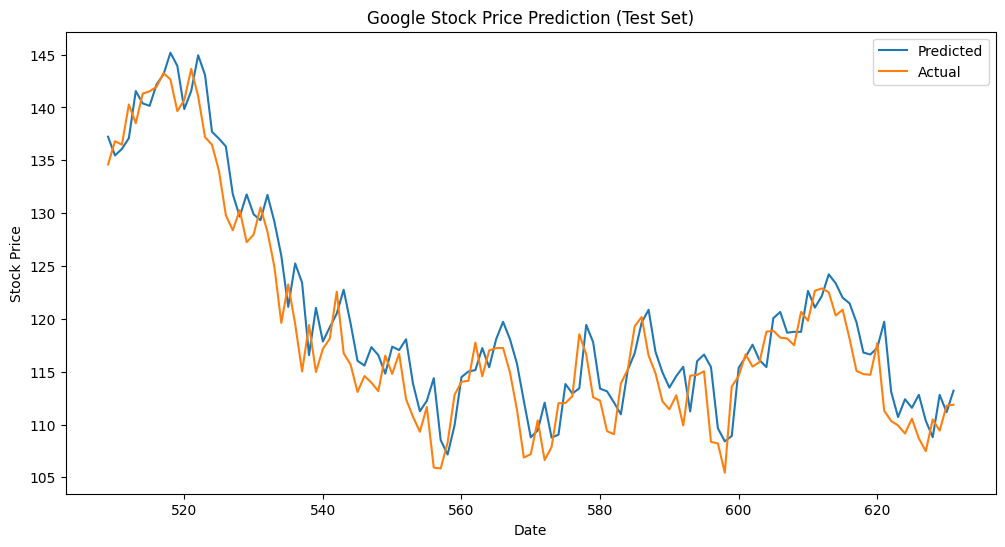

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[split+sequence_length:], y_test_pred_actual, label='Predicted')
plt.plot(df.index[split+sequence_length:], scaler.inverse_transform(y_test), label='Actual')
plt.title('Google Stock Price Prediction (Test Set)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()